In [1]:
# Perform regressions on the data set regression-data-set.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# a. Read the data set into a data frame
data = pd.read_csv('../regression-data-set.csv')

In [3]:
# b. Convert the x and y columns into numpy arrays
x_data = np.array(data['x'])
y_data = np.array(data['y'])

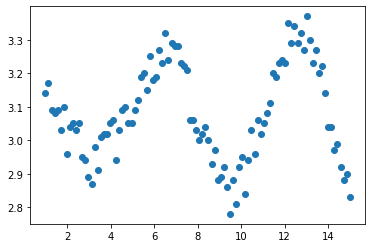

In [4]:
# c. make a scatter plot of y as a function of x
plt.scatter(x_data, y_data)
plt.show()

In [5]:
# d. write a function that will perform polynomial fits of multiple
# degrees for a single train/test split of the data and returns
# some measure of the means square error
def fit_polynomial(x, y, degree):
    # split data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    
    # fit a polynomial of degree `degree` to the training data
    fit = np.polyfit(x_train, y_train, degree)
    
    # test the fit curve on the testing data
    y_predicted = np.polyval(fit, x_test)
    
    # calculate means squared error of the tested data
    mse = mean_squared_error(y_test, y_predicted)
    
    # return the mse
    return mse

In [6]:
# e. perform 100 train/test splits and collect the error as a function
# of degree. 100 errors for each degree

# set degree for loop
degree = 1

# create a 2D array to store errors for each degree
errors_per_degree = [list() for _ in range(15)]
errors_per_degree.insert(0, None)
for i in range(1500):
    # every 100 tests increase the degree value
    if i % 100 == 0 and i > 0:
        degree += 1
    
    # calculate error
    error = fit_polynomial(x_data, y_data, degree)
    
    # append error to correct degree slot in 2D error array
    errors_per_degree[degree].append(error)

In [7]:
# f. for each degree find the mean and standard deviation of the error

# means of the errors for each degree
means = [np.array(errors).mean() for errors in errors_per_degree[1:]]
means.insert(0, None)

# standard deviation of the errors for each degree
stds = [np.array(errors).std() for errors in errors_per_degree[1:]]
stds.insert(0, None)

In [8]:
# g. make a plot of the error as a function of degree

# create array of degrees
degs = np.linspace(1,15,15)

# convert means and stderrs to numpy arrays
means = np.array(means[1:])
stds = np.array(stds[1:])

# create plot of errors
fig, ax = plt.subplots()
ax.plot(degs, means, marker='o')
ax.set_yscale('log')
plt.close()

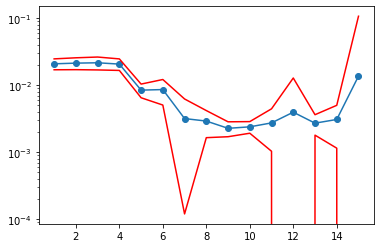

In [9]:
# h. on the same plot add the mean plus/minus one sigma

# add to plot a std step over/under the mean line
ax.plot(degs, means+stds, color='red')
ax.plot(degs, means-stds, color='red')

# output graph
fig

In [10]:
# i. using your own judgement, determine your favorite degree fit

# since I'm a computer science major my judgement is based on programming so I will just find the min of the means
df = pd.DataFrame({'degree':degs, 'mean_error':means, 'std':stds}, index=degs, columns=['mean_error','std'])
best_degree = df[df['mean_error'] == df['mean_error'].min()].index.values.astype(int)[0]

best_mean = df.sort_values(by='std')['std'].index.values.astype(int)[0]
best_std = df.sort_values(by='mean_error')['mean_error'].index.values.astype(int)[0]

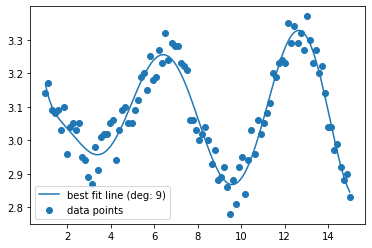

In [11]:
# j. on another plot fit the original data to the best degree fit and
# plot it. Add the original data as markers

fig2, ax2 = plt.subplots()

# add data points to plot
ax2.scatter(x_data, y_data, label="data points")

# get line data for best fit line
fit = np.polyfit(x_data,y_data,best_degree)

# generate x values to test fit
x_fit = np.linspace(1,15,200)
# plot y values
y_fit = np.polyval(fit, x_fit)

# plot fit line
ax2.plot(x_fit, y_fit, label="best fit line (deg: %d)"%(best_degree))
ax2.legend()
plt.close()

# output graph
fig2